<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-первичному-осмотру" data-toc-modified-id="Вывод-по-первичному-осмотру-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по первичному осмотру</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Очистим-от-лишних-символов" data-toc-modified-id="Очистим-от-лишних-символов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Очистим от лишних символов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Делим-на-выборки" data-toc-modified-id="Делим-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Делим на выборки</a></span></li><li><span><a href="#Преобразуем-текст-в-вектор" data-toc-modified-id="Преобразуем-текст-в-вектор-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Преобразуем текст в вектор</a></span></li><li><span><a href="#Исследуем-баланс-классов" data-toc-modified-id="Исследуем-баланс-классов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем баланс классов</a></span></li><li><span><a href="#Логистичкская-регрессия" data-toc-modified-id="Логистичкская-регрессия-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Логистичкская регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
import numpy as np
import nltk
import pandas as pd
import re

from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/datasets/toxic_comments.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [4]:
data.head(10)

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
5,5,"""\n\nCongratulations from me as well, use the ...",0
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,7,Your vandalism to the Matt Shirvington article...,0
8,8,Sorry if the word 'nonsense' was offensive to ...,0
9,9,alignment on this subject and which are contra...,0


In [5]:
data = data.drop('Unnamed: 0', axis=1)

### Вывод по первичному осмотру

Данные подготовленные, лишний столбец (дублировал индексы)Unnamed удалила

### Лемматизация

In [6]:
corpus = data['text']

In [9]:
%%time

from tqdm import tqdm
tqdm.pandas()
wnl = WordNetLemmatizer()

def lemmatize_wordnet(text):
    text = nltk.word_tokenize(text)
    lem_text = ' '.join([wnl.lemmatize(i) for i in text]) 
    return lem_text


data['lemm_wordnet'] = data['text'].progress_apply(lemmatize_wordnet)   

100%|██████████| 159292/159292 [02:16<00:00, 1170.60it/s]

CPU times: user 2min 11s, sys: 1.88 s, total: 2min 13s
Wall time: 2min 16s


Лемматизация из теории долго отрабатывала, взяла WordNetLemmatizer

### Очистим от лишних символов

In [10]:
def clear_text(text):
    re_text = re.sub(r'[^a-zA-Z ]', ' ', text)
    re_text = re_text.split()
    clear_text = " ".join(re_text)
    
    return clear_text

In [11]:
%%time

new_corpus = data['lemm_wordnet']

for i in range(len(new_corpus)):
    new_corpus[i] = clear_text(new_corpus[i])

<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 9min 22s, sys: 5.76 s, total: 9min 28s
Wall time: 9min 29s


In [12]:
lemm_wordnet = data['lemm_wordnet'].str.lower()

In [13]:
data['lemm_wordnet'] = pd.Series(lemm_wordnet)

In [14]:
data.head(10)

,text,toxic,lemm_wordnet
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he match this background colour i m seem...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it s...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i ca n t make any real suggestion on impr...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...
5,"""\n\nCongratulations from me as well, use the ...",0,congratulations from me a well use the tool we...
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,cocksucker before you piss around on my work
7,Your vandalism to the Matt Shirvington article...,0,your vandalism to the matt shirvington article...
8,Sorry if the word 'nonsense' was offensive to ...,0,sorry if the word nonsense wa offensive to you...
9,alignment on this subject and which are contra...,0,alignment on this subject and which are contra...


### Вывод

Текст лемматизирован и очищен. Добавила его как новый столбец в исходный датафрейм

## Обучение

### Делим на выборки

In [15]:
features = data['lemm_wordnet']
target = data['toxic']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    train_size=0.6, 
    random_state=12345, 
)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, 
    target_valid, 
    train_size=0.5, 
    random_state=12345, 
)

In [16]:
features_train.shape

(95575,)

In [17]:
features_valid.shape

(31858,)

In [18]:
features_test.shape

(31859,)

### Преобразуем текст в вектор

In [19]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
count_tf_idf = TfidfVectorizer(stop_words=stopwords)

tf_idf_train = count_tf_idf.fit_transform(features_train)

tf_idf_valid = count_tf_idf.transform(features_valid)

tf_idf_test = count_tf_idf.transform(features_test)

print("Размер матрицы:", tf_idf_train.shape, tf_idf_valid.shape, tf_idf_test.shape)

Размер матрицы: (95575, 121576) (31858, 121576) (31859, 121576)


### Исследуем баланс классов

In [21]:
class_frequency = data['toxic'].value_counts(normalize=True)

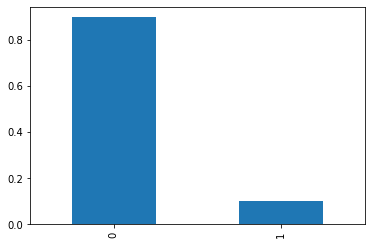

In [22]:
class_frequency.plot(kind='bar');

Классы сильно различаются по размеру, поэтому везде буду использовать class_weight='balanced'

### Логистичкская регрессия

In [23]:
from sklearn.model_selection import GridSearchCV
param = { 'C': range(1, 11, 2), 'class_weight': [None, 'balanced'] }

model_lr = LogisticRegression()

# инициализируем GridSearchCV
cv_lr = GridSearchCV(estimator = model_lr, 
                           param_grid = param, 
                           cv = 3,
                           n_jobs = -1, 
                           verbose = 0, 
                           scoring = 'f1',
                          )
cv_lr.fit(tf_idf_train, target_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': range(1, 11, 2),
                         'class_weight': [None, 'balanced']},
             scoring='f1')

In [24]:
cv_lr.best_score_

0.7598338211648707

In [25]:
cv_lr.best_params_

{'C': 9, 'class_weight': 'balanced'}

In [26]:
target_pred = cv_lr.predict(tf_idf_valid)

In [27]:
f1_score(target_valid, target_pred)

0.7603915448999858

Получилось, спасибо)

### Дерево решений

In [24]:
f1, max_depth  = [], []

for depth in range(40, 80, 10):
    model_tree = DecisionTreeClassifier(
        random_state=12345, 
        criterion='gini', 
        max_depth=depth,
        class_weight='balanced'
    )
    model_tree.fit(tf_idf_train, target_train)
    predictions_valid_tree = model_tree.predict(tf_idf_valid)
    
    max_depth.append(depth)
    f1.append(f1_score(target_valid, predictions_valid_tree))
    
    print("max_depth =", depth, ": ", f1[-1])

max_depth = 40 :  0.6004408523144746
max_depth = 50 :  0.6190405021670901
max_depth = 60 :  0.6321615557217652
max_depth = 70 :  0.627156125608138


### Случайный лес

In [29]:
best_model = None
best_result = 0
best_depth = 0
best_est = 0

for est in range(1, 16):
    model_rf = RandomForestClassifier(
        random_state=12345, 
        n_estimators=est, 
        max_depth=None,
        class_weight='balanced'
        ) 
    model_rf.fit(tf_idf_train, target_train)
    predictions_valid = model_rf.predict(tf_idf_valid)

    result_rf = f1_score(target_valid, predictions_valid)
    if result_rf > best_result:
        best_model = model_rf 
        best_result = result_rf 
        best_est = est

print("F1:", best_result)
print("Кол-во деревьев:", best_est)

F1: 0.6101694915254237
Кол-во деревьев: 15


## Тестирование

### Логистическая регрессия

In [28]:
target_pred_test = cv_lr.predict(tf_idf_test)

In [29]:
f1_score(target_test, target_pred_test)

0.7507629704984741

## Выводы

- Произведена подготовка данных: текст лемматизирован, очищен и преобразован в вектор
- Данные разделены на выборки
- Модели обучены, выбрана и протестирована лучшая модель - логистическая регрессия

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны